# Input Data: 2D Arrays or Images

There are several options for plotting 2D datasets.  `imshow`, `pcolor`, and `pcolormesh` have a lot of overlap, at first glance.  The image below is meant to clarify that somewhat.

<img src="images/imshow_example.png">
<img src="images/pcolor_example.png">

In short, `imshow` can interpolate and display large arrays very quickly, while `pcolormesh` and `pcolor` are much slower, but can handle flexible (i.e. more than just rectangular) arrangements of cells.

We won't dwell too much on the differences and overlaps here.  They have overlapping capabilities, but different default behavior because their primary use-cases are a bit different (there's also `matshow`, which is `imshow` with different defaults).  

Instead we'll focus on what they have in common.

`imshow`, `pcolor`, `pcolormesh`, `scatter`, and any other Matplotlib plotting methods that map a range of data values onto a colormap will return artists that are instances of `ScalarMappable.`  In practice, what that means is a) you can display a colorbar for them, and b) they share several keyword arguments.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
import numpy as np

# Load the bivariate normal data from the .npy file
data = np.load('assets/bivariate_normal.npy')

## Take a quick look at the data

In [10]:
print("Data Shape:", data.shape)
print("Data Range: min =", np.min(data), ", max =", np.max(data))   
print("Data Mean:", np.mean(data))


Data Shape: (15, 15)
Data Range: min = -1.6939936746020778 , max = 1.3856608412833054
Data Mean: 0.002830205850663429


### Plot the data

## Colorbars

Let's plot the image and add a colorbar to display what colors correspond to values of `data` we've plotted. 

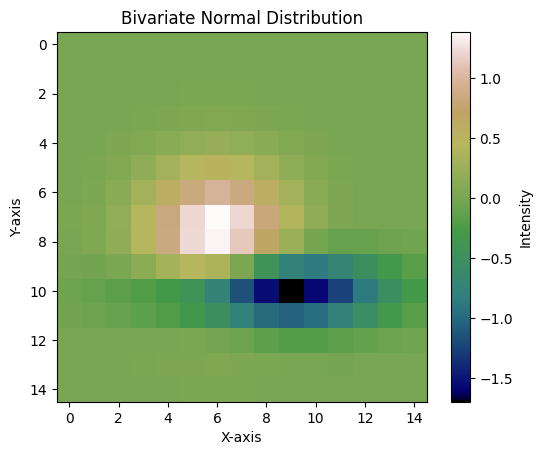

In [12]:
fig, ax = plt.subplots() # Create a figure and axis
# Display the data as an image with `imshow`
im = ax.imshow(data, # 2D data array
               cmap='gist_earth' # Colormap, style of colors
               )

#add a colorabar to the plot with a label
cbar = fig.colorbar(im)
cbar.set_label('Intensity')

#add title and labels
ax.set_title('Bivariate Normal Distribution')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

You may notice that `colorbar` is a `Figure` method and not an `Axes` method.  That's because `colorbar` doesn't operate on the axes. Instead, it shrinks the current axes by a bit, adds a _new_ axes to the figure, and places the colorbar on that axes.

The new axes that `fig.colorbar` creates is fairly limited in where it can be positioned.   For example, it's always outside the axes it "steals" room from. Sometimes you may want to avoid "stealing" room from an axes or maybe even have the colorbar _inside_ another axes.  In that case, you can manually create the axes for the colorbar and position it where you'd like:

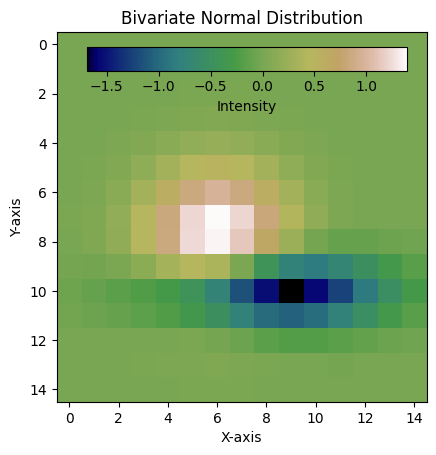

In [14]:
fig, ax = plt.subplots() # Create a figure and axis
# Create an axes for the colorbar, 0.27 from left, 0.8 from bottom, 0.5 wide, 0.05 high
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(data, cmap='gist_earth')

#add a colorabar to the plot with a label
cbar = fig.colorbar(im,
                    cax=cax, # Specify the axes for the colorbar
                    orientation='horizontal' # Horizontal colorbar)
)
cbar.set_label('Intensity')

#add title and labels
ax.set_title('Bivariate Normal Distribution')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

The last part of this section will cover `axes_grid`, which is very useful for aligning colorbars and/or other axes with images displayed with `imshow`.

  ### Shared parameters for `imshow`, `pcolormesh`, `contour`, `scatter`, etc
  
 Building on the previous sections, any plotting method that creates a `ScalarMappable` will have some common kwargs.  The ones you'll use the most frequently are:
  
  * `cmap` : The colormap (or name of the colormap) used to display the input.  (We'll go over the different colormaps in the next section.)
  * `vmin` : The minimum data value that will correspond to the "bottom" of the colormap (defaults to the minimum of your input data).
  * `vmax` : The maximum data value that will correspond to the "top" of the colormap (defaults to the maximum of your input data).
  * `norm` : A `Normalize` instance to control how the data values are mapped to the colormap. By default, this will be a linear scaling between `vmin` and `vmax`, but other norms are available (e.g. `LogNorm`, `PowerNorm`, etc).
  
`vmin` and `vmax` are particularly useful.  Quite often, you'll want the colors to be mapped to a set range of data values, which aren't the min/max of your input data. For example, you might want a symmetric ranges of values around 0, or have several plots that needs to share the same colorscale to support a comparison.

Lets look at the below examples to see why

### Precipitation for Tuolumne with different scale for each precipitation product
<img src='images/PrecipDiffScale.png' width = '800'>

### Precipitation for Tuolumne the same scale for each precipitation product

<img src='images/PrecipSameScale.png' width = '800'>

See the documentation for longer discussions of [colormaps](https://matplotlib.org/tutorials/colors/colormaps.html) and [norms](https://matplotlib.org/tutorials/colors/colormapnorms.html).

As an example of that, let's use a divergent colormap with the data we showed earlier. 

In [15]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

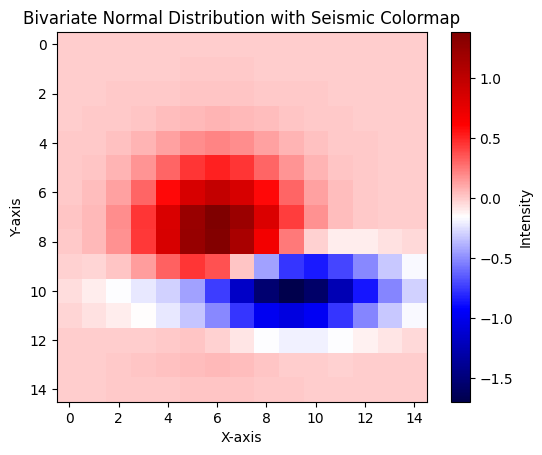

In [16]:
fig, ax = plt.subplots() # Create a figure and axis
# Display the data as an image with `imshow` using a different colormap
im = ax.imshow(data, # 2D data array
               cmap='seismic' # Different colormap
               )
#add a colorabar to the plot with a label
cbar = fig.colorbar(im)
cbar.set_label('Intensity')

#add title and labels
ax.set_title('Bivariate Normal Distribution with Seismic Colormap')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.show()

Sometimes you want the center of the colormap to coorespond to 0  A quick way to do this is to make the `vmin` equal to the negative of the `vmax`.  

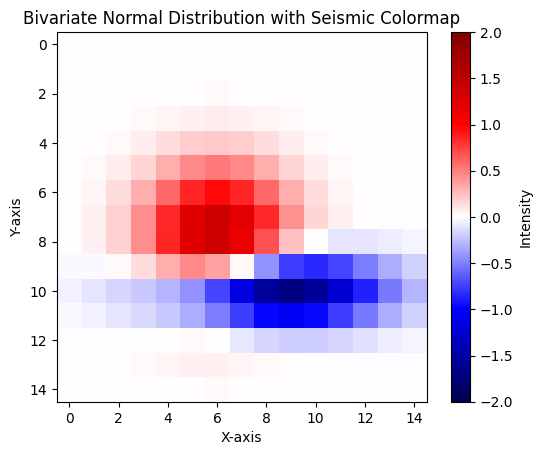

In [17]:
fig, ax = plt.subplots() # Create a figure and axis
im = ax.imshow(data, # 2D data array
               cmap='seismic', # Different colormap
               vmin=-2, # Set minimum data value for colormap 
               vmax=2 # Set maximum data value for colormap
               )
#add a colorabar to the plot with a label
cbar = fig.colorbar(im)
cbar.set_label('Intensity')

#add title and labels
ax.set_title('Bivariate Normal Distribution with Seismic Colormap')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.show()

`vmin` and `vmax` are also very useful when we want multiple plots to share one colorbar, as our next exercise will do.

## Exercise 2.2:

Can you reproduce the figure below?
<img src="images/exercise_2.2-vmin_vmax_imshow_and_colorbars.png">

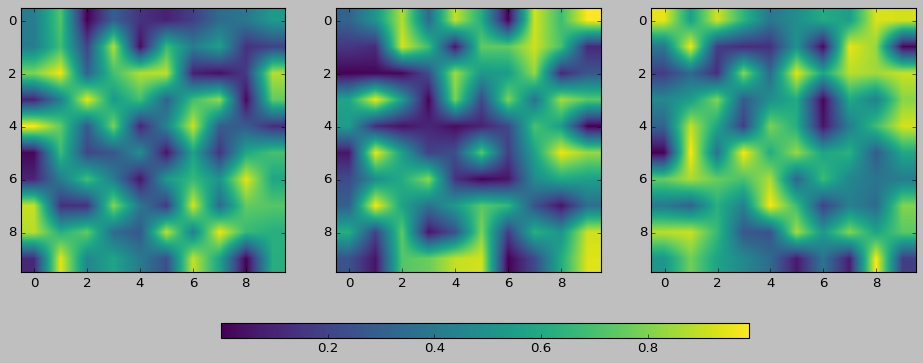

In [2]:
# Set the random seed for reproducibility
np.random.seed(1)

plt.style.use('classic')

# Generate random data with different ranges...
data1 = np.random.random((10, 10))
data2 = 2 * np.random.random((10, 10))
data3 = 3 * np.random.random((10, 10))

# Set up our figure and axes...
fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(0.5))
fig.tight_layout() # Make the subplots fill up the figure a bit more...
cax = fig.add_axes([0.25, 0.1, 0.55, 0.03]) # Add an axes for the colorbar

# Now you're on your own!
axes[0].imshow(data1, cmap='viridis')
axes[1].imshow(data2, cmap='viridis')
axes[2].imshow(data3, cmap='viridis')
fig.colorbar(axes[0].images[0], cax=cax, orientation='horizontal')
plt.show()

Next Chapter [Part4: How To Speak Matplotlib ](Part4-HowToSpeakMPL.ipynb )